In [1]:
import sys
import os

current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import turbine

class Format:
    end = '\033[0m'
    underline = '\033[4m'

fluid   = "REFPROP::HYDROGEN"

T_in    = 73.9768228935084 #K
P_in    = 29.4024300000000 #bar
P_out   = 7.79700000000000 #bar

m       = 15526.8974206746/3600 #kg/s

Turbine1 = turbine.Turbine(fluid, T_in, P_in, P_out, m)

In [2]:
Turbine1.initialSpec()

TURBO-EXPANDER INITIAL SPECIFICATION INITIAL SPECIFICATION
Fluid: HYDROGEN
Mass flow [kg/s] : 4.313

Inlet Condition
P [bar]     =  29.402
T [Kelvin]  =  73.98
H [kJ/kg]   =  947.817
S [kJ/kg.K] =  21.258


Isentropic Outlet Condition
P [bar]     =  7.797
T [Kelvin]  =  43.56
H [kJ/kg]   =  656.384
S [kJ/kg.K] =  21.258


Δh_is [kJ/kg]  =  291.433
Power_is [kW]  = 1256.958


In [3]:
#design constraint
u1_max  = 500 #m/s

Turbine1.noOfStages(u1_max)

Mininum and Maximum Number of Stage
Wheel Tip Velocity [m/s]  =  500
Δh_max/stage [kJ/kg] =  255.102
Min. number of stage =  1
Max. number of stage =  3


In [4]:
Turbine1.rotationalSpeedRange()

Minimum & Maximum Rotational Speed
Min. RPM =  29133.296
Max. RPM =  101169.551


Rotational Speed Selection Plot 

Specific speed range for radial compressor is between 0.4-0.8


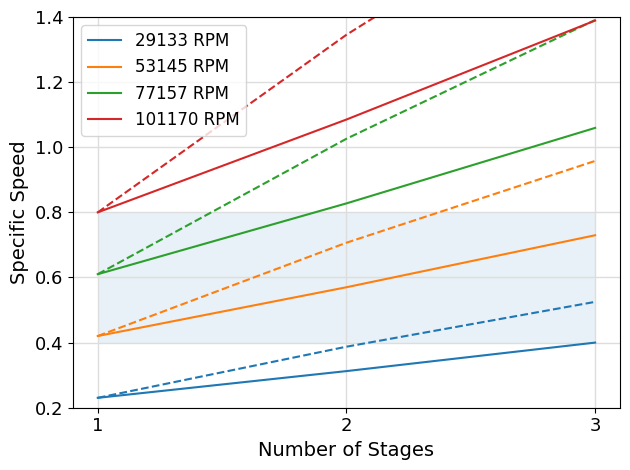

In [5]:
Turbine1.nzSelectionPlot()

In [6]:
Turbine1.stagesCalculation(61000, 1, True)

Stage 1
Delta enthalpy [kJ/kg]:261.36
Expansion ratio:3.77
Power [kW]:1127.27
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 1535.8,
 'Stator outlet pressure [bar]': 15.61,
 'Stator outlet temperature [℃]': -214.15,
 'Rotor outlet pressure [bar]': 7.8,
 'Rotor outlet temperature [℃]': -227.12,
 'Total-to-static efficiency [%]': 86.53,
 'Isentropic efficiency [%]': 89.7}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.63,
 'Rotor hub diameter ratio': 0.185,
 'Stator inlet diameter [cm]': 20.21,
 'Rotor inlet diameter [cm]': 15.23,
 'Rotor outlet diameter [cm]': 9.6,
 'Blade height at rotor inlet  [cm]': 0.97,
 'Blade height at rotor outlet  [cm]': 3.39}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 134.9,
                      'Absolute tangential rotor inlet': 536.9,
                      'Absolute rotor inlet': 553.6,
                      'Absolute tangential rotor outlet': 0.0,
                      'Absolute meridional rotor outlet

In [7]:
Turbine1.turbDictionary()

RADIAL INFLOW TURBINE FINAL SPECIFICATION
{'Fluid': 'HYDROGEN',
 'Mass flow [kg/s]': 4.3130270612985,
 'Turbine type': 'Radial inflow turbine',
 'Rotational speed [RPM]': 61000,
 'Number of stages': 1,
 'Max. tip velocity [m/s]': 500,
 'Inlet pressure [bar]': 29.4,
 'Inlet temperature [C]': -199.17,
 'Inlet volumetric [m3/h]': 1535.8,
 'Delta enthalpy [kJ/kg]': 261.36,
 'Expansion ratio': 0.27,
 'Turbine power [kW]': 1127.27,
 'Turb. Isentropic eff. [%]': 89.68,
 'Turb. Polytropic eff. [%]': 85.97}


In [8]:
StandardCond       = turbine.streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 273, 1.01325*1e5)
Volumetric_Nm3PerH = (Turbine1.massFlow/StandardCond.D)*3600

In [9]:
print(StandardCond.D)
print(Volumetric_Nm3PerH)

0.08993187859670276
172651.7633452825
